# Testing Alpha Update upon Negative Attestations

An agent executes a negative attestation when they desire to decrease the system alpha such that it is closer in magnitude to their private belief of alpha.

To make a negative attestation, the agent bonds $\Delta s$ quantity of supply tokens to the $S_0$ bucket. In exchange, they get $\Delta q_0$ quantity of negative claims. 

$$\alpha_{t+1} = (\epsilon) \alpha + (1-\epsilon)\cdot(1-\delta) \alpha + (1-\epsilon).(\delta) \bar\alpha$$
<br/> where $\epsilon$ is the designer-defined fixed weight between [0,1] and $\delta=\frac{\Delta s}{S_1+S_0+\Delta s}$ is the dynamic weight.

The realized alpha, $\bar\alpha$ is given by $$\bar\alpha = \frac{R(B - \frac{\Delta s}{S})}{\frac{\Delta s}{S}(C)-B(R)}$$ where $B=\left[\frac{q_0+\Delta q_0}{Q_0+\Delta q_0} \frac{S_0+\Delta s}{S} - \frac{q_0}{Q_0} \frac{S_0}{S}\right]$ 

In the following tests, we want to verify if the update in alpha is directionally correct - i.e we see an decrease with each negative attestaion - and if the resultant system alpha is within its domain [0,1].

### Intitialize state variables


In [2]:
E = 0.45
C = 7000
R = 3000
S = 300

Q0 = [100]
q0 = [0]
S1 = [100] 
S0 = [100]
s0 = [0]
s = [50]

alpha = [0.1]

### Input an agent action signal 
The agent action signal contains a series of $\Delta s$ that they would use to make positive attestations.

In [3]:
deltas = [1, 4, 5, 6, 3, 0, 1, 7, 8, 4, 5, 6, 2]

### Compute $\alpha_{t+1}$ for each agent action event and update state variables

State variables are updated in each iteration
            
- $S \rightarrow S - \Delta s$
- $Q_1 \rightarrow Q_1$
- $Q_0 \rightarrow Q_0 + \Delta q$
- $S_1 \rightarrow S_1$
- $S_0 \rightarrow S0 + \Delta s $
<br/> <br/> 
- $s \rightarrow s - \Delta s$
- $q_1 \rightarrow q_1$
- $q_0 \rightarrow q_0 + \Delta q$
- $s_1 \rightarrow s_1$
- $s_0 \rightarrow s_0 + \Delta s$
<br/> <br/> 
- $\alpha_t \rightarrow \alpha_{t+1}$


In [4]:
import math

for i in range(len(deltas)): 
  
    A = 1+(deltas[i]/S)
    deltaq0 = Q0[i]*(math.sqrt(A-1))
    
    if deltas[i] == 0:
        new_alpha = alpha[i]
        print("alpha[i] =", alpha[i], "| new_alpha = ", new_alpha)
        print("deltas =", deltas[i], " | deltaq0 = ", deltaq0)
        print("Q0[i] = ", Q0[i])
        print("s[i] =" , s[i])
        print("____________________________")
    else:    
        attest_prop_after = (q0[i]+deltaq0)/(Q0[i]+deltaq0)
        supply_prop_after = (S0[i]+deltas[i])/S
        attest_supply_before = (q0[i]/Q0[i])*(S0[i]/S)
    
        B = (attest_prop_after * supply_prop_after) - attest_supply_before
    
        D = deltas[i]/(S1[i]+S0[i]+deltas[i])
    
        pre1= B-deltas[i]/S

        pre2 = ((deltas[i]/S)*C)
    
        alpha_bar = (R*(pre1))/((pre2*C)+(B*R))
    
        T1 = E*alpha[i]
    
        T2 = (1-E)*(1-D)*alpha[i]
    
        T3 = (1-E)*(D)*alpha_bar
    
        new_alpha = T1+T2+T3
    
        print("D = ", D)
        print("alpha_bar = ", alpha_bar)
        print("alpha[i] =", alpha[i], "| new_alpha = ", new_alpha)
        print("deltas =", deltas[i], " | deltaq0 = ", deltaq0)
        print("Q0[i] = ", Q0[i])
        print("s[i] =" , s[i])
        print("____________________________")  
    
    # Update operations
    Q0.append(Q0[i] + deltaq0)
    S0.append(S0[i] + deltas[i])
    S1.append(S1[i])
    s0.append(s0[i] + deltas[i])
    s.append(s[i] - deltas[i])
    q0.append(deltaq0)
    alpha.append(new_alpha)

D =  0.004975124378109453
alpha_bar =  0.0002762096825186302
alpha[i] = 0.1 | new_alpha =  0.09972712395684273
deltas = 1  | deltaq0 =  5.773502691896324
Q0[i] =  100
s[i] = 50
____________________________
D =  0.01951219512195122
alpha_bar =  9.93870323219118e-05
alpha[i] = 0.09972712395684273 | new_alpha =  0.09865794824350642
deltas = 4  | deltaq0 =  12.213672050459229
Q0[i] =  105.77350269189633
s[i] = 49
____________________________
D =  0.023809523809523808
alpha_bar =  8.316580374521868e-05
alpha[i] = 0.09865794824350642 | new_alpha =  0.09736708799727144
deltas = 5  | deltaq0 =  15.232078761440219
Q0[i] =  117.98717474235555
s[i] = 45
____________________________
D =  0.027777777777777776
alpha_bar =  7.565337391352601e-05
alpha[i] = 0.09736708799727144 | new_alpha =  0.09588069107941459
deltas = 6  | deltaq0 =  18.84004750742875
Q0[i] =  133.21925350379576
s[i] = 40
____________________________
D =  0.0136986301369863
alpha_bar =  0.00013975791181913242
alpha[i] = 0.0958806910

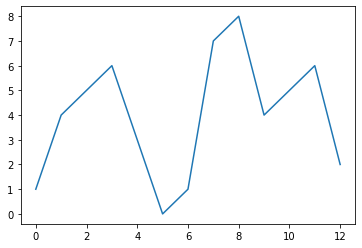

In [5]:
import matplotlib.pyplot as plt

plt.plot(deltas)

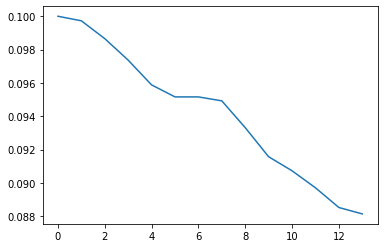

In [6]:
plt.plot(alpha)

## Testing $\alpha$ component at means and extremes

In [1]:
# Set state variables

E = 0.45
C = 7000
R = 3000

Q = [40]
Q1 = [30]
Q0 = [10]

S = 1000
S1 = [900] 
S0 = [100]

q0 = [0]
s0 = [0]
s = [50]

alpha = [0.9]

# Input agent action signal
deltas = [1, 4, 5, 6, 3, 0, 1, 7, 8, 4, 5, 6, 2]

In [2]:
import math

for i in range(len(deltas)): 
  
    A = 1+(deltas[i]/S)
    deltaq0 = Q0[i]*(math.sqrt(A-1))
    
    if deltas[i] == 0:
        new_alpha = alpha[i]
        print("alpha[i] =", alpha[i], "| new_alpha = ", new_alpha)
        print("deltas =", deltas[i], " | deltaq0 = ", deltaq0)
        print("Q0[i] = ", Q0[i])
        print("s[i] =" , s[i])
        print("____________________________")
    else:    
        attest_prop_after = (q0[i]+deltaq0)/(Q0[i]+deltaq0)
        supply_prop_after = (S0[i]+deltas[i])/S
        attest_supply_before = (q0[i]/Q0[i])*(S0[i]/S)
    
        B = (attest_prop_after * supply_prop_after) - attest_supply_before
    
        D = deltas[i]/(S1[i]+S0[i]+deltas[i])
    
        pre1= B-deltas[i]/S

        pre2 = ((deltas[i]/S)*C)
    
        alpha_bar = (R*(pre1))/((pre2*C)+(B*R))
    
        T1 = E*alpha[i]
    
        T2 = (1-E)*(1-D)*alpha[i]
    
        T3 = (1-E)*(D)*alpha_bar
    
        new_alpha = T1+T2+T3
    
        print("D = ", D)
        print("alpha_bar = ", alpha_bar)
        print("alpha[i] =", alpha[i], "| new_alpha = ", new_alpha)
        print("deltas =", deltas[i], " | deltaq0 = ", deltaq0)
        print("Q0[i] = ", Q0[i])
        print("s[i] =" , s[i])
        print("____________________________")  
    
    # Update operations
    Q0.append(Q0[i] + deltaq0)
    S0.append(S0[i] + deltas[i])
    S1.append(S1[i])
    s0.append(s0[i] + deltas[i])
    s.append(s[i] - deltas[i])
    q0.append(deltaq0)
    alpha.append(new_alpha)

D =  0.000999000999000999
alpha_bar =  0.00012830199249134542
alpha[i] = 0.9 | new_alpha =  0.8995055650010948
deltas = 1  | deltaq0 =  0.3162277660168205
Q0[i] =  10
s[i] = 50
____________________________
D =  0.003980099502487562
alpha_bar =  3.3317141600093114e-05
alpha[i] = 0.8995055650010948 | new_alpha =  0.897536571025681
deltas = 4  | deltaq0 =  0.652455532033675
Q0[i] =  10.316227766016821
s[i] = 49
____________________________
D =  0.0049504950495049506
alpha_bar =  2.607686905460598e-05
alpha[i] = 0.897536571025681 | new_alpha =  0.8950928543336704
deltas = 5  | deltaq0 =  0.7756030340739049
Q0[i] =  10.968683298050497
s[i] = 45
____________________________
D =  0.005905511811023622
alpha_bar =  2.2292671544476487e-05
alpha[i] = 0.8950928543336704 | new_alpha =  0.892185636958193
deltas = 6  | deltaq0 =  0.9097085075481842
Q0[i] =  11.744286332124402
s[i] = 40
____________________________
D =  0.002944062806673209
alpha_bar =  6.0214397724953743e-05
alpha[i] = 0.892185636958

#### With initial $\alpha = 0.5$. 
At $\alpha = 0.5$, the corresponding state variables are initialized as:<br/>
$$Q = 40$$
$$Q1 = 20$$
$$Q0 = 20$$
<br/>
$$S = 1000$$
$$S1 = 500$$
$$S0 = 500$$

Text(0.5, 1.0, 'alpha, initialized at 0.5')

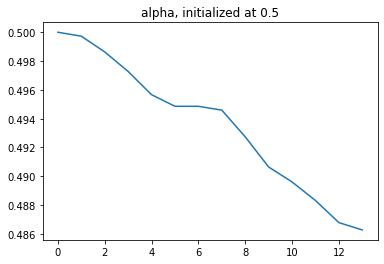

In [4]:
import matplotlib.pyplot as plt

plt.plot(alpha)
plt.title("alpha, initialized at 0.5")

#### With initial $\alpha = 0.1$. 
At $\alpha = 0.1$, the corresponding state variables are initialized as:<br/>
$$Q = 40$$
$$Q1 = 10$$
$$Q0 = 30$$
<br/>
$$S = 1000$$
$$S1 = 100$$
$$S0 = 900$$

Text(0.5, 1.0, 'alpha, initialized at 0.1')

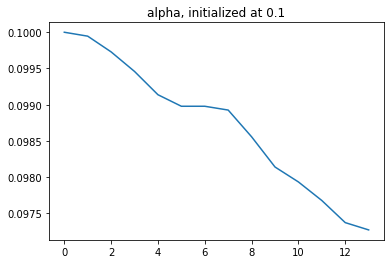

In [3]:
import matplotlib.pyplot as plt

plt.plot(alpha)
plt.title("alpha, initialized at 0.1")

#### With initial $\alpha = 0.9$. 
At $\alpha = 0.9$, the corresponding state variables are initialized as:<br/>
$$Q = 40$$
$$Q1 = 30$$
$$Q0 = 10$$
<br/>
$$S = 1000$$
$$S1 = 900$$
$$S0 = 100$$

Text(0.5, 1.0, 'alpha, initialized at 0.9')

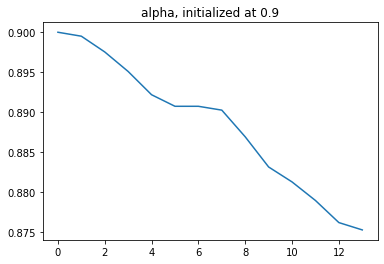

In [3]:
import matplotlib.pyplot as plt

plt.plot(alpha)
plt.title("alpha, initialized at 0.9")

## Tests for $\alpha$ heuristic model

### Model 1 - Using Expected Payout

$$\Delta s = random(0-0.5)*s*\left(\frac{q_1}{Q_1}(C+R) + \frac{q_0}{Q_0}(R) \right)$$ 


In [102]:
import random

E = 0.45
C = 7000
R = 3000
S = 300

Q0 = [100]
q0 = [40]
Q1 = [150]
q1 = [60]
S1 = [100] 
S0 = [100]
s0 = [0]
s = 50

alpha = 0.8
private_alpha = 0.6

pre1 = (q1[0]/Q1[0])*(C+R)
pre2 = (q0[0]/Q0[0])*(R)

theta = pre1+pre2
rand_percent = random.randint(0,50)/100

del_s = rand_percent*(pre1 + pre2)*s

print("theta = ", theta)
print("% s = ", rand_percent)
print("delta s = ", del_s)

theta =  5200.0
% s =  0.45
delta s =  117000.0


### Model 2 - Using difference in $\alpha$ and $\hat\alpha$

$$\Delta s = random(0 - 0.5)*s*10*(\alpha-\bar\alpha)$$ 

In [104]:
import random

E = 0.45
C = 7000
R = 3000
S = 300

Q0 = [100]
q0 = [40]
Q1 = [150]
q1 = [60]
S1 = [100] 
S0 = [100]
s0 = [0]
s = 50

alpha = 0.5
private_alpha = 0.4

rand_percent = random.randint(0,50)/100

del_s = (alpha-private_alpha)*10*(rand_percent*s)

print(rand_percent)
print(del_s)

0.44
21.999999999999996


#### Model 2: Trial w/ minimum choice of s
Set rand_percent = 0

In [105]:
import random

E = 0.45
C = 7000
R = 3000
S = 300

Q0 = [100]
q0 = [40]
Q1 = [150]
q1 = [60]
S1 = [100] 
S0 = [100]
s0 = [0]
s = 50

alpha = 0.5
private_alpha = 0.4

rand_percent = 0/100

del_s = (alpha-private_alpha)*10*(rand_percent*s)

print(rand_percent)
print(del_s)

0.0
0.0


#### Model 2: Trial w/ maximum choice of s
Set rand_percent = 50

In [107]:
import random

E = 0.45
C = 7000
R = 3000
S = 300

Q0 = [100]
q0 = [40]
Q1 = [150]
q1 = [60]
S1 = [100] 
S0 = [100]
s0 = [0]
s = 50

alpha = 0.5
private_alpha = 0.4

rand_percent = 50/100

del_s = (alpha-private_alpha)*10*(rand_percent*s)

print(rand_percent)
print(del_s)

0.5
24.999999999999993


### Model 3 - Using discrete buckets based on $| \alpha - \hat\alpha |$

To attest, an agent needs to make a choice of $\Delta s$ quantity of tokens to bond towards positive attetstations $S_1$ or towards negative attetstations $S_0$. 

The choice of $\Delta s$ is primarily based on the difference between the agent's private belief of alpha, $\hat\alpha$ and the system alpha, $\alpha$. 

$$\Delta s 	\propto |\alpha - \hat\alpha|$$

We design a heuristric that scales $\Delta s$ based on the difference between the agent's $\hat\alpha$ and the system $\alpha$, while avoiding double spend i.e $Delta s$ cannot exceed the agent's current token holdings $s$.

$$\Delta s = random(0-0.25)*s \space \vee \space random(0.25-0.5)*s \space \vee \space random(0.5-0.75)*s \space \vee \space random(0.75-1)*s $$

In [4]:
import random

E = 0.45
C = 7000
R = 3000
S = 300

Q0 = [100]
q0 = [40]
Q1 = [150]
q1 = [60]
S1 = [100] 
S0 = [100]
s0 = [0]
s = 50

alpha = 0.5
private_alpha = 0.4

diff = abs(alpha - private_alpha)

print(diff)

if diff > 0.75 and diff <= 1:
    del_s = (random.randint(75, 100)/100)*s
    
elif diff > 0.5 and diff <= 0.75:
    del_s = (random.randint(50, 75)/100)*s

elif diff > 0.25 and diff <= 0.5:
    del_s = (random.randint(25, 50)/100)*s

elif diff > 0 and diff <= 0.25:
    del_s = (random.randint(1, 25)/100)*s


print(del_s)

0.09999999999999998
2.0


#### Model 3: Trial w/ minimum of $| \alpha - \hat\alpha |$

Set $\alpha = 0.6$ and $\hat\alpha = 0.6$

In [2]:
import random

E = 0.45
C = 7000
R = 3000
S = 300

Q0 = [100]
q0 = [40]
Q1 = [150]
q1 = [60]
S1 = [100] 
S0 = [100]
s0 = [0]
s = 50

alpha = 0.6
private_alpha = 0.6

diff = abs(alpha - private_alpha)

print(diff)

if diff > 0.75 and diff <= 1:
    del_s = (random.randint(75, 100)/100)*s
    
elif diff > 0.5 and diff <= 0.75:
    del_s = (random.randint(50, 75)/100)*s

elif diff > 0.25 and diff <= 0.5:
    del_s = (random.randint(25, 50)/100)*s

elif diff > 0 and diff <= 0.25:
    del_s = (random.randint(1, 25)/100)*s

else: 
    del_s = 0
    print("No attestation")


print(del_s)

0.0
No attestation
0


#### Model 3: Trial w/ maximum of $| \alpha - \hat\alpha |$

Set $\alpha = 1$ and $\hat\alpha = 0$

In [9]:
import random

E = 0.45
C = 7000
R = 3000
S = 300

Q0 = [100]
q0 = [40]
Q1 = [150]
q1 = [60]
S1 = [100] 
S0 = [100]
s0 = [0]
s = 50

alpha = 1
private_alpha = 0

diff = abs(alpha - private_alpha)

print(diff)

if diff > 0.75 and diff <= 1:
    del_s = (random.randint(75, 100)/100)*s
    
elif diff > 0.5 and diff <= 0.75:
    del_s = (random.randint(50, 75)/100)*s

elif diff > 0.25 and diff <= 0.5:
    del_s = (random.randint(25, 50)/100)*s

elif diff > 0 and diff <= 0.25:
    del_s = (random.randint(1, 25)/100)*s


print(del_s)

1
41.0


### Model 4 - Using variable bandwidth thresholds on $\alpha$

To account for variations in agent's uncertainty at extremes i.e when $\alpha = 0$ or $\alpha = 1$, we define a threshold band between $g_1$ and $g_0$. The thickness of the band represents the range of $\Delta s$ choices that an agent searches whilst making an attestation. Typically, the band is fat at  $\alpha = 0.5$ since the agent is uncertain about how many tokens to attest. However, at the extremes $\alpha = 0$ and $\alpha = 1$, the agent's search range decreases as they are more confident about their choice of $\Delta s$.

$d$ modulates the curvature of the band. A small $d$ indicates that the agents are equally uncertain at means and extremes. A large $g$ indicates that agents are very uncertain at $\alpha = 0.5$ but relatively certain at the extremes $\alpha = 0$ and $\alpha = 1$.
<br/><br/>
$f$ is a parameter that controls whether the agents are fully certain at the extremes.
<br/>
$$d = 4\sigma(1-\alpha)(\alpha)$$

The upper band $g_1$ is defined by
$$g_1 = d + (1-d-f)\alpha + f$$

The lower band $g_0$ is defined by
$$g_0 = (1-d-f)\alpha$$

$$max\_attest = ps + (g_1-g_0)$$
$$min\_attest = ps - (g_1-g_0)$$
where $p$ is the designer-defined percentage of $s$ tokens that the agent considers attesting with

$$\Delta s = rand(min\_attest, max\_attest)$$

### Model 5 - Using variable bandwidth thresholds on $\alpha - \hat\alpha$

$m \in [0, 0.5]$ is a parameter that modulates the curvature of the band. A small $m$ indicates that the agents are equally uncertain at means and extremes. A large $m$ indicates that agents are very uncertain at $|\alpha-\hat\alpha|= 0.5$ but relatively certain at the extremes $|\alpha-\hat\alpha| = 0$ and $|\alpha-\hat\alpha|= 1$.
$$d = 4*m*(1-a)(a)$$
<br/>
$f \in [0, 0.5] $ is a parameter that controls whether the agents are fully certain at the extremes.
<br/><br/>
$a$ is the difference between the system alpha and the agent's private beleif of alpha.
$$a = |\alpha-\hat\alpha|$$

The upper band $g_1$ is defined by
$$g_1 = d + (1-d-f)a + f$$

The lower band $g_0$ is defined by
$$g_0 = (1-d-f)a$$

The agent's choice of $\Delta s$ they would like to use to attest is
$$\Delta s = rand(g_0, g_1) * s$$

In [35]:
import random

alpha = 0.6
alpha_hat = 0.7
s = 20

a = abs(alpha - alpha_hat)

f = 0.03
m = 0.15

d = 4*m*(1-a)*(a)

g1 = d + (1-d-f)*a + f
g0 = (1-d-f)*a

del_s = random.uniform(g0,g1)*s

print("a = ", a)
print("del_s = ", del_s)


a =  0.09999999999999998
del_s =  2.814005730563571
